# Experiment 1 - Common use case, optimizing N threads

In [33]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [34]:
folder_path1    = 'results/focustest3/'
number_of_runs  = 1
number_of_tests = 240

Set files to read

In [35]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [37]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

kernel_repeats_min = 100
kernel_repeats_max = 1000
kernel_repeats_step = 100
grid_size_min = 32
grid_size_max = 256
grid_size_step = 32
num_workers_min = 8
num_workers_max = 32
num_workers_step = 8

kernel_repeats_values = range(kernel_repeats_min, kernel_repeats_max + kernel_repeats_step, kernel_repeats_step)
grid_size_values = range(grid_size_min, grid_size_max + grid_size_step, grid_size_step)
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
num_workers_values.remove(24)
nwv_len = len(num_workers_values)
gsv_len = len(grid_size_values)
krv_len = len(kernel_repeats_values)

kernel_repeats = kernel_repeats_values[0]
grid_size = grid_size_values[0]
num_workers = num_workers_values[0]

for i in range(len(data)):
    num_workers = num_workers_values[i % nwv_len]
    grid_size = grid_size_values[(i // nwv_len) % gsv_len]
    kernel_repeats = kernel_repeats_values[(i // (nwv_len * gsv_len)) % krv_len]
    dataset.append([grid_size, num_workers, data[i].mean()[0], "mulpd", kernel_repeats])

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Kernel", "Kernel Repeats"]
# dataset

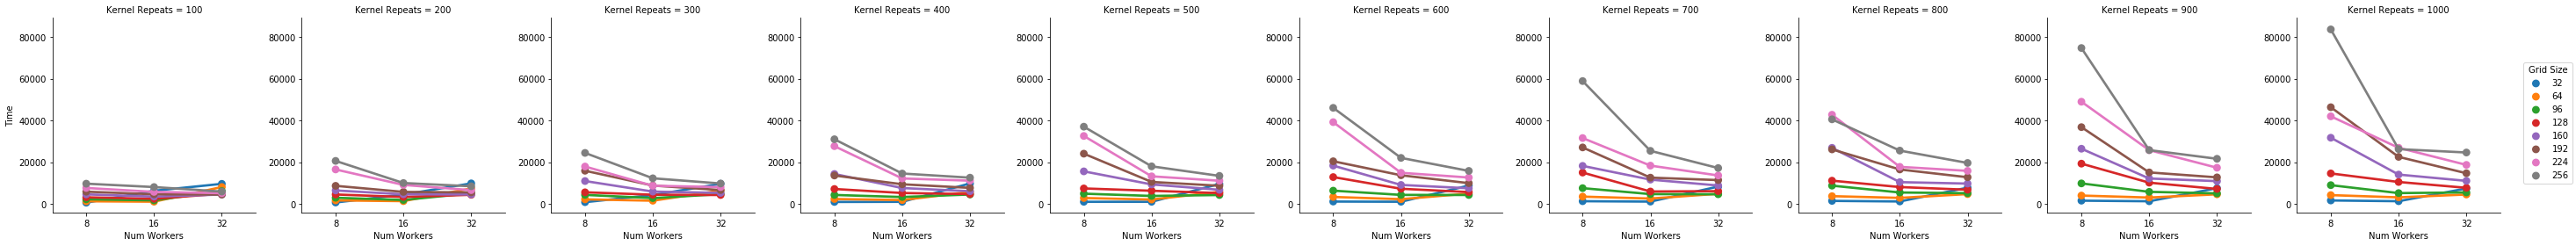

In [39]:
sns.factorplot(x="Num Workers", y="Time",
               col="Kernel Repeats",
               hue="Grid Size",
               data=dataset);
plt.savefig("graphs/focustest3/focustest1.png")
plt.show()

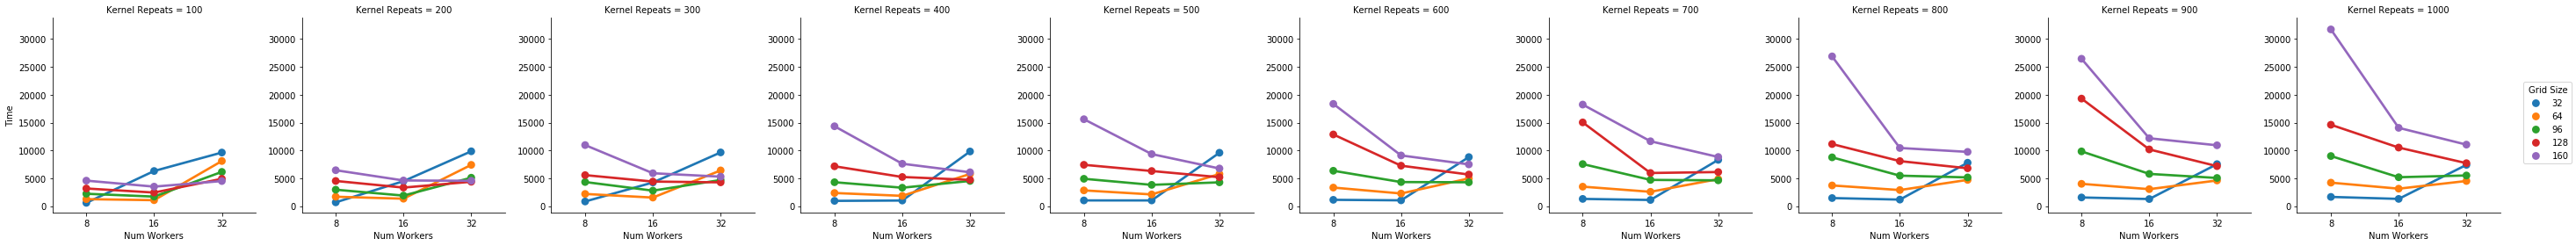

In [41]:
dataset = dataset.loc[dataset["Grid Size"] <= 160]

sns.factorplot(x="Num Workers", y="Time",
               col="Kernel Repeats",
               hue="Grid Size",
               data=dataset);
plt.savefig("graphs/focustest3/focustest2.png")
plt.show()